# Daily Template
* 태현씨가 전달한 버전으로 그래프 수정

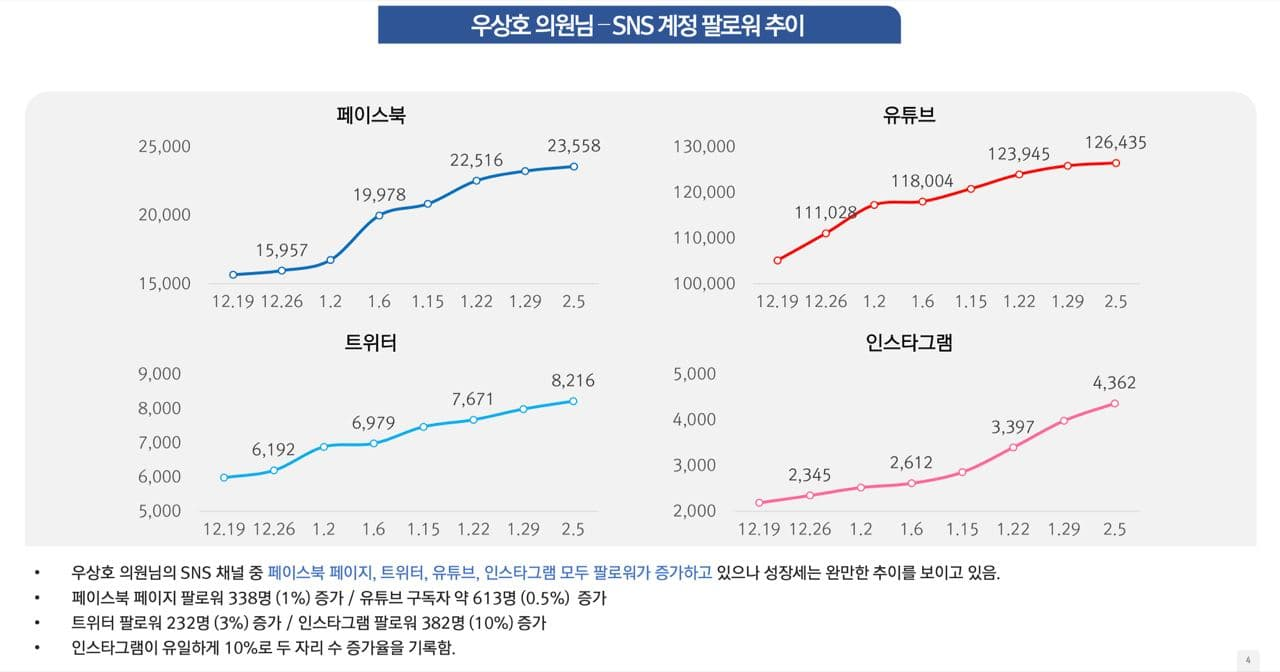

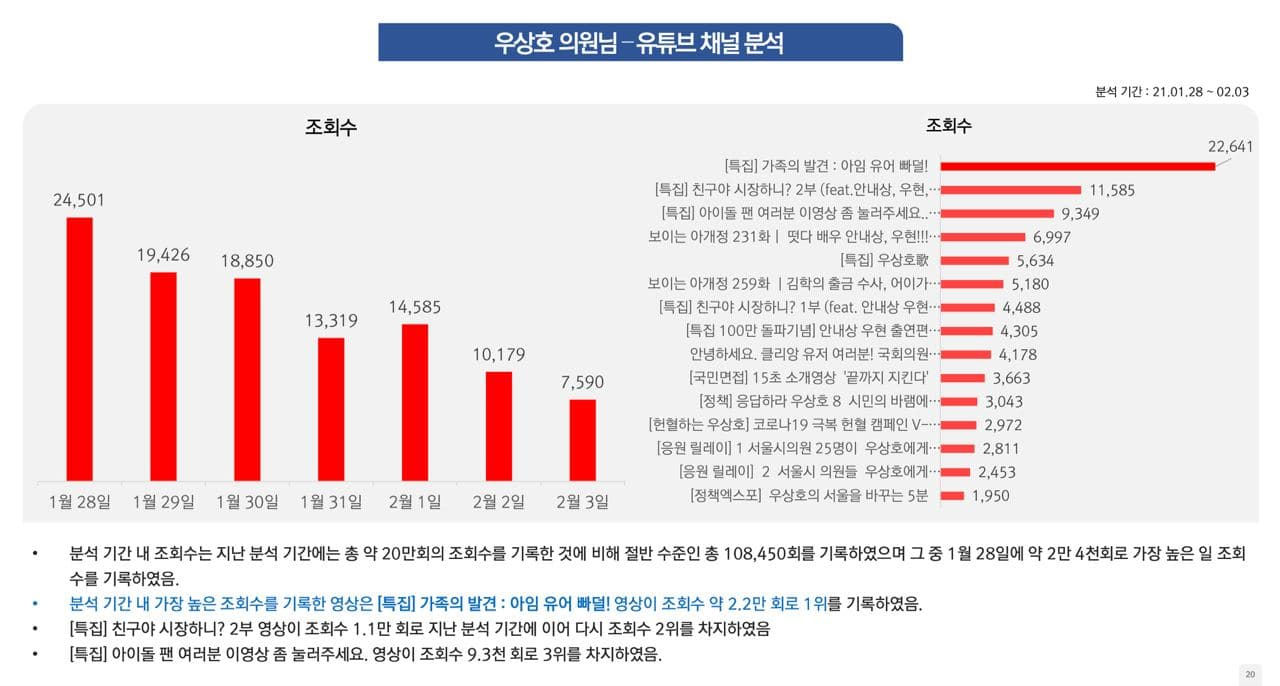

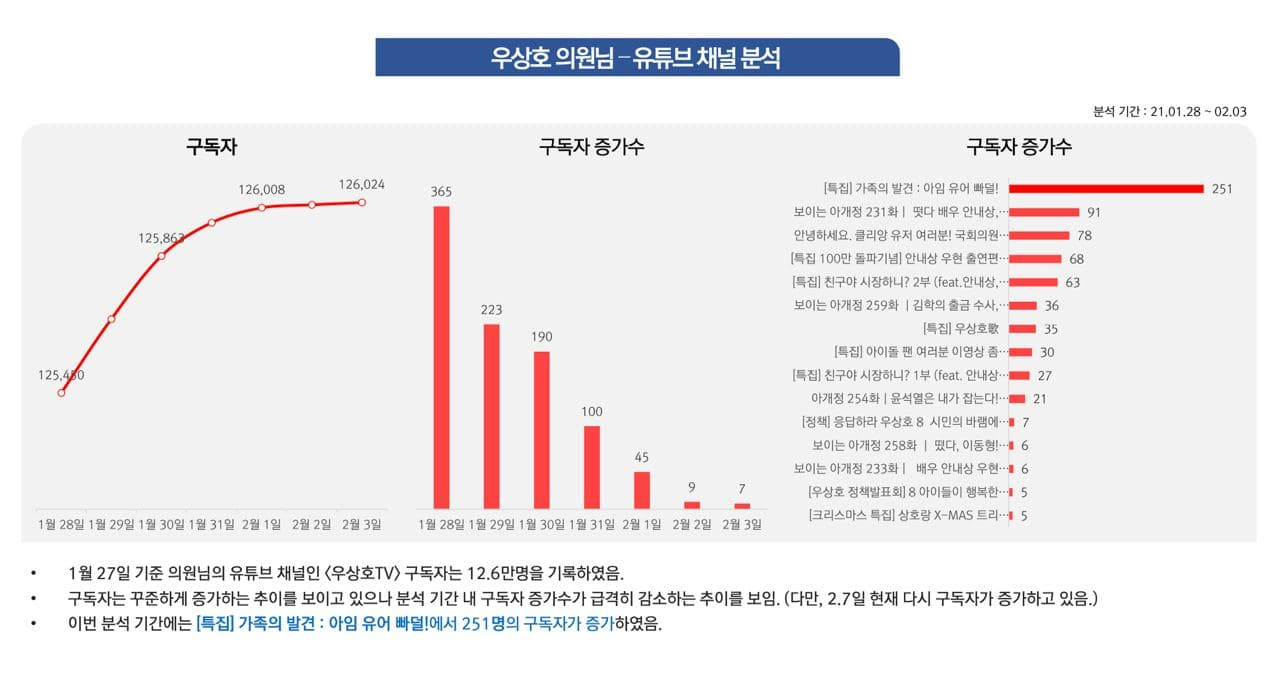

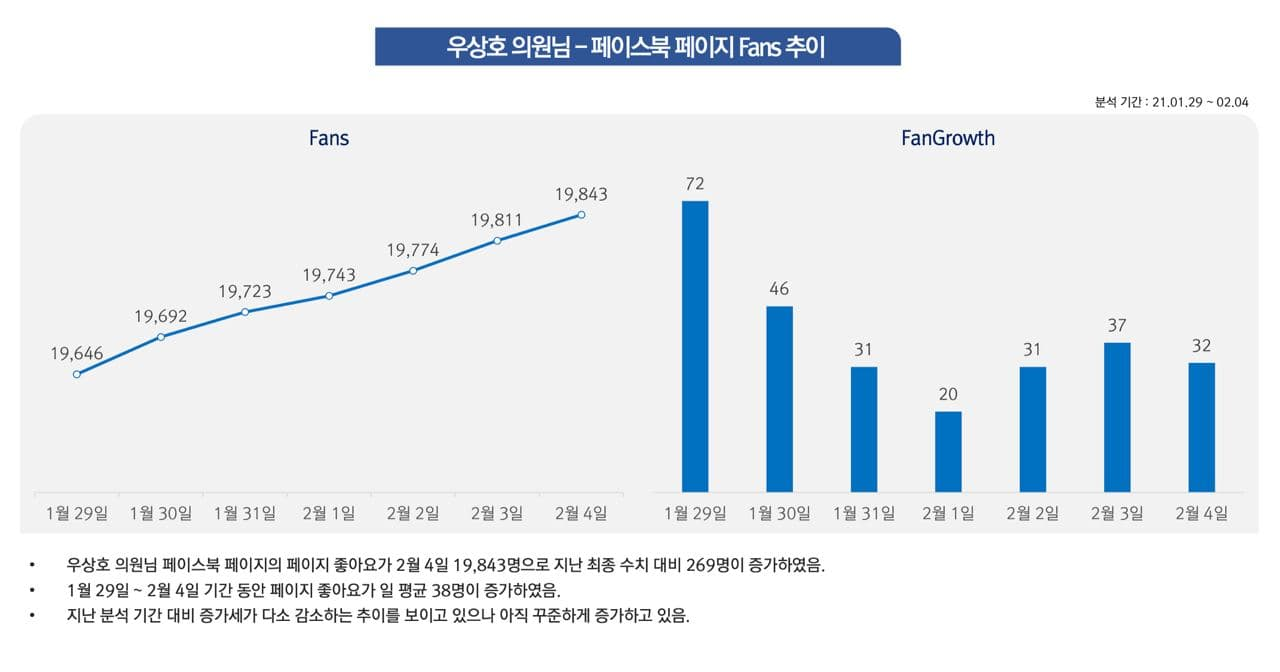

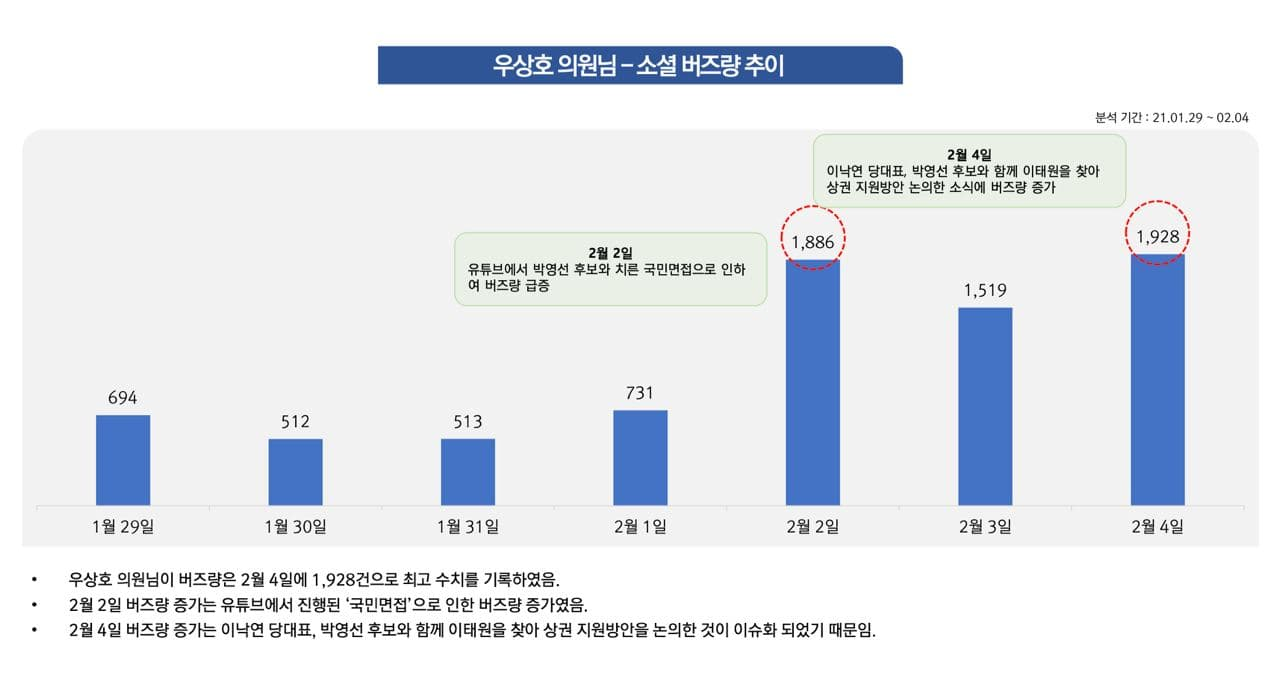

In [1]:
import os
import nltk
import datetime
import numpy as np

import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from konlpy.tag import Twitter

In [42]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
date_week = "2021-11-24"

In [3]:
data_path = "../sns_data/{}".format(date_week)
os.mkdir(data_path)

In [4]:
plot_path = "../weekly_plots/{}".format(date_week)
os.mkdir(plot_path)

In [5]:
fnames = ['youtube', 'facebook', 'article','datalab']
for f in fnames:
    os.mkdir(os.path.join(data_path, f))

In [84]:
# Change file name


In [85]:
font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [6]:
## artificial data
#instagram_follower = 1507
instagram_follower = 2426
youtube_subscribers = 4350
facebook_follower = 576

In [7]:

# df_yt_subscription = pd.read_csv("../sns_data/2021-10-13/youtube/subscription_data.csv")
# df_yt_gender_age = pd.read_csv("../sns_data/2021-10-13/youtube/gender_age_data.csv")
#df_yt_video_data = pd.read_csv("../sns_data/{}/youtube/Chart data.csv".format(date_week))
df_yt_table_data = pd.read_csv("../sns_data/{}/youtube/Table data.csv".format(date_week))
df_yt_subscription_data = pd.read_csv("../sns_data/{}/youtube/Totals.csv".format(date_week))

# df_fb_contents = pd.read_csv("../sns_data/2021-10-13/facebook/contents.csv")
#df_fb_results = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_results.csv")
# df_fb_targets = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_targets.csv")
df_fb_insights = pd.read_csv("../sns_data/{}/facebook/facebook_insights.csv".format(date_week))


df_article = pd.read_csv("../sns_data/{}/article/article.csv".format(date_week))
df_article['pubDate'] =  pd.to_datetime(df_article['pubDate'])

df_datalab = pd.read_csv("../sns_data/{}/datalab/datalab.csv".format(date_week))
df_datalab= df_datalab.iloc[6:]
df_datalab.columns = ["Date", "버즈량"]

In [8]:
fb_follower = df_fb_insights[["날짜", "Daily New Likes"]]

fb_follower = fb_follower.drop(0)
fb_follower.columns = ["Date" , "Counts"]
fb_follower["Date"] = pd.to_datetime(fb_follower["Date"])


# Select dates in between

# fb_follower = fb_follower.loc[(fb_follower['Date'] > start_date) & (fb_follower["Date"] < end_date) \
#                   | (fb_follower['Date'] == start_date) | (fb_follower["Date"] == end_date)]

fb_follower['sns_type'] = "Facebook"

In [9]:
fb_follower = fb_follower.fillna(0)

In [10]:
df_yt_table_data.head()

,Video,Video title,Video publish time,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,285244.0,2887.4263,293.0,124841,6.60
1,4bsHlVdU2MU,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),"Oct 25, 2021",92522.0,898.6056,86.0,1439,3.06
2,grzpPq1HQCI,김동연이 민주당의 종로 지역구 후보로 나올 수도 있다? #shorts,"Nov 10, 2021",91525.0,486.6945,35.0,769,5.33
3,W4u6C5a7gPU,모 후보의 '전두환 발언' 에 대한 김동연의 생각,"Oct 22, 2021",35863.0,313.9756,47.0,4684,11.98
4,uaxeDvnxURE,야잘알 김동연 #shorts,"Nov 15, 2021",29707.0,317.7172,3.0,2096,4.48


## 구독자 수 그래프
* 유투브 데이터 구독자로 바꾸기
* 페이스북 페이지 정보 가져오기

In [14]:
start_date = datetime.datetime(2021, 11, 17)
end_date = datetime.datetime(2021, 11, 24)

In [22]:
## View time series graph

colnames = ["Date", "Counts",]

# Youtube
df_yt_subscription_data.columns = colnames
df_yt_subscription_data['Date'] = pd.to_datetime(df_yt_subscription_data['Date'])
yt_follower = df_yt_subscription_data.copy()
yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
              | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]


start_sub = youtube_subscribers -  yt_follower['Counts'].sum()
yt_follower['Counts'] = yt_follower['Counts'].cumsum() + start_sub
# df_temp = df_yt_table_data[["Video title", "Subscribers", "Video publish time"]]
# total_subscribers = df_temp["Subscribers"].loc[0]

# df_temp.dropna(inplace=True)
# df_temp["Video publish time"] = pd.to_datetime(df_temp["Video publish time"])
# df_temp.sort_values("Video publish time", inplace=True)
# grs = df_temp.groupby("Video publish time")

# yt_follower = grs.sum()
# yt_follower.reset_index(inplace=True)

# newcomer_sum = yt_follower['Subscribers'].sum()
# start_sum = total_subscribers - newcomer_sum
# yt_follower['Subscribers'] =  yt_follower['Subscribers'].cumsum() + start_sum
# yt_follower.columns = colnames
# yt_follower['sns_type'] = "Youtube"

# yt_follower['Date'] = pd.to_datetime(yt_follower['Date'])
# yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
#               | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]
    
# df_yt_subscription_data.columns = colnames
# df_yt_subscription_data['Date'] = pd.to_datetime(df_yt_subscription_data['Date'])
# yt_follower = df_yt_subscription_data.copy()
# yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
#               | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]
    
    
    
# Facebook
# columns = df_fb_results.iloc[1]
# df_plot = df_fb_results.iloc[-7:] # 날짜 때문에 임의로
# df_plot.columns = columns



# temp_list = []
# for record in df_plot.iterrows():
#     date = record[1]['날짜'][:10]
#     view = int(record[1]['Facebook 페이지 도달'])
#     temp_list.append({"Date": date, "Counts": view})
    
# fb_follower = pd.DataFrame(temp_list)
# fb_follower['sns_type'] = "Facebook"
fb_follower = df_fb_insights[["날짜", "Daily New Likes"]]

fb_follower = fb_follower.drop(0)
fb_follower.columns = ["Date" , "Counts"]
fb_follower["Date"] = pd.to_datetime(fb_follower["Date"])



# Select dates in between
fb_follower = fb_follower.loc[(fb_follower['Date'] > start_date) & (fb_follower["Date"] < end_date) \
                  | (fb_follower['Date'] == start_date) | (fb_follower["Date"] == end_date)]

fb_follower['sns_type'] = "Facebook"
fb_follower = fb_follower.fillna(0)
fb_follower['Counts'] = fb_follower["Counts"].map(int)

total_sum = fb_follower['Counts'].sum()
facebook_follower_start = facebook_follower - total_sum
fb_follower['Counts'] = fb_follower['Counts'].cumsum() + facebook_follower_start


# Facebook page


# Article
art_views = df_article[["title", "pubDate"]]
grs = art_views.groupby("pubDate")
art_follower = grs.count()
art_follower.reset_index(inplace=True)
art_follower.columns = ["Date", "Counts"]


# Instagram Followers
date = fb_follower['Date'].tolist()
insta_follower = pd.DataFrame({"Date" : date})
#counts = [1518] * 4 + [1889] * 3 + [instagram_follower]  # Temp
insta_follower.shape[0]
counts = np.linspace(1518 ,1889 ,7)
insta_follower["Counts"] = counts
insta_follower['sns_type'] = "Instagram"

In [25]:
# # Change Date
dfs = [fb_follower, insta_follower, art_follower, yt_follower]
for df in dfs:
    df['Date'] = df['Date'].apply(lambda x : x.strftime("%m-%d"))

    


In [26]:
yt_follower["Date"].head(1).item()

'11-17'

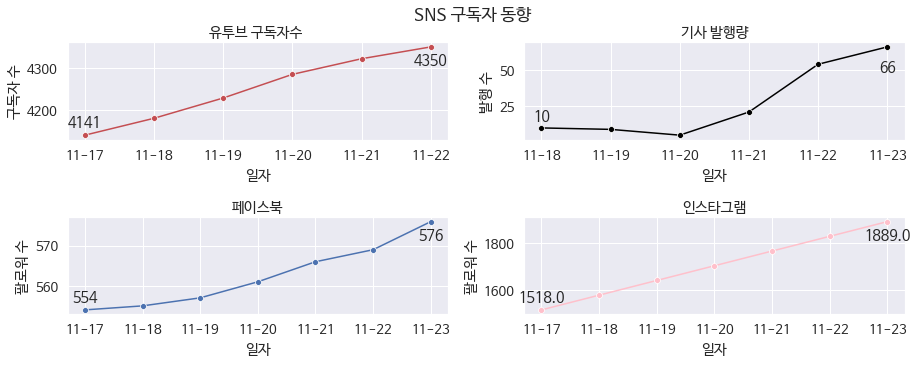

In [27]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
fig.suptitle("SNS 구독자 동향")
plt.subplots_adjust(hspace=0.8)
sns.lineplot(ax=axes[0,0] ,x="Date", y="Counts", color='r', data=yt_follower, marker="o")
axes[0,0].set_title("유투브 구독자수 ")
axes[0,0].set_xlabel("일자")
axes[0,0].set_ylabel("구독자 수")

start_x, start_y = yt_follower["Date"].head(1).item(), yt_follower["Counts"].head(1).item()
end_x, end_y = yt_follower["Date"].tail(1).item(), yt_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[0,0].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[0,0].text(end_x, end_y - length * 0.2, str(end_y), ha="center")


sns.lineplot(ax=axes[0,1] ,x="Date", y="Counts", color='black', data=art_follower, marker="o")
axes[0,1].set_title("기사 발행량")
axes[0,1].set_xlabel("일자")
axes[0,1].set_ylabel("발행 수")
start_x, start_y = art_follower["Date"].head(1).item(), art_follower["Counts"].head(1).item()
end_x, end_y = art_follower["Date"].tail(1).item(), art_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[0,1].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[0,1].text(end_x, end_y  - length * 0.3, str(end_y), ha="center")




sns.lineplot(ax=axes[1,0] ,x="Date", y="Counts", data=fb_follower, marker="o")
axes[1,0].set_title("페이스북")
axes[1,0].set_xlabel("일자")
axes[1,0].set_ylabel("팔로워 수")
start_x, start_y = fb_follower["Date"].head(1).item(), fb_follower["Counts"].head(1).item()
end_x, end_y = fb_follower["Date"].tail(1).item(), fb_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[1,0].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[1,0].text(end_x, end_y - length * 0.2, str(end_y), ha="center")

sns.lineplot(ax=axes[1,1] ,x="Date", y="Counts", color='pink',
             data=insta_follower, marker="o")
axes[1,1].set_title("인스타그램")
axes[1,1].set_xlabel("일자")
axes[1,1].set_ylabel("팔로워 수")
start_x, start_y = insta_follower["Date"].head(1).item(), insta_follower["Counts"].head(1).item()
end_x, end_y = insta_follower["Date"].tail(1).item(), insta_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[1,1].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[1,1].text(end_x, end_y - length * 0.2, str(end_y), ha="center")

plt.savefig("../weekly_plots/{}/sns_overall.png".format(date_week), transparent=True)

## Youtube 조회수 그래프

In [29]:
df_yt_chart_data = pd.read_csv("../sns_data/{}/youtube/Chart data view.csv".format(date_week))
df_yt_chart_data =  df_yt_chart_data.dropna()
df_yt_chart_data['Video publish time'] = pd.to_datetime(df_yt_table_data['Video publish time'])
df_yt_chart_data.head()

chart_df = df_yt_chart_data[["Date", "Video title", "Video publish time", "Views"]]


In [30]:
chart_df.head()

,Date,Video title,Video publish time,Views
0,2021-11-16,문재인 정부의 정책에 대한 공과 과? 저는 소신껏 목소리를 냈습니다 #shorts,NaT,47
1,2021-11-17,문재인 정부의 정책에 대한 공과 과? 저는 소신껏 목소리를 냈습니다 #shorts,2021-10-25,1487
2,2021-11-18,문재인 정부의 정책에 대한 공과 과? 저는 소신껏 목소리를 냈습니다 #shorts,2021-11-10,1657
3,2021-11-19,문재인 정부의 정책에 대한 공과 과? 저는 소신껏 목소리를 냈습니다 #shorts,2021-10-22,2280
4,2021-11-20,문재인 정부의 정책에 대한 공과 과? 저는 소신껏 목소리를 냈습니다 #shorts,2021-11-15,1571


In [31]:
grs = chart_df.groupby("Date")
view_gr_sum = grs.sum()
view_gr_sum.reset_index(inplace=True)
view_gr_sum.columns = ["Date", "조회 수"]
view_gr_sum['Date'] = pd.to_datetime(view_gr_sum['Date'])
view_gr_sum['Date'] = view_gr_sum['Date'].apply(lambda x : x.strftime("%m-%d"))

In [32]:
view_gr_sum

,Date,조회 수
0,11-16,25321
1,11-17,24138
2,11-18,23402
3,11-19,34919
4,11-20,59737
5,11-21,49321
6,11-22,41142


In [33]:
grs = chart_df.groupby("Video title")
title_gr_sum = grs.sum()
title_gr_sum.sort_values('Views', inplace=True, ascending=False)
title_gr_sum.reset_index(inplace=True)

title_gr_sum['Video title'].loc[0][:15]
title_gr_sum['Video title'] = title_gr_sum['Video title'].apply(lambda x : x[:20])
title_gr_sum['Video title'].iloc[4] = "누군가 국가를 위해"

title_gr_sum

/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Video title,Views
0,한 국가의 지도자가 공감 능력을 갖지,92522
1,김동연이 민주당의 종로 지역구 후보로,91525
2,모 후보의 '전두환 발언' 에 대한,35863
3,야잘알 김동연 #shorts,29707
4,누군가 국가를 위해,8363


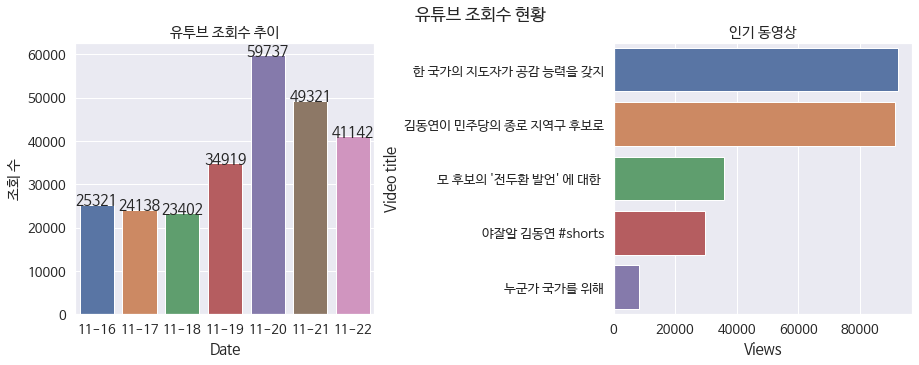

In [34]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("유튜브 조회수 현황")
plt.subplots_adjust(wspace=0.8)

# 유투브 조회수
sns.barplot(ax=axes[0] ,x="Date", y="조회 수", data=view_gr_sum)
axes[0].set_title("유투브 조회수 추이")
for index, row in view_gr_sum.iterrows():
    axes[0].text(index, row['조회 수'], str(row['조회 수']), ha='center')
    
sns.barplot(ax=axes[1], x=title_gr_sum['Views'], y=title_gr_sum['Video title'])
axes[1].set_title("인기 동영상")
plt.savefig("../weekly_plots/{}/youtube_views.png".format(date_week), transparent=True)

## Datalab 

In [35]:
df_article.head()

,Unnamed: 0,title,originallink,link,description,pubDate
0,1,<b>김동연</b> &quot;진정한 모빌리티는 교통약자·소셜·리더십에서&quot;,http://www.newsis.com/view/?id=NISX20211123_00...,https://news.naver.com/main/read.naver?mode=LS...,기사내용 요약이동의 자유·사회적 역동성·기동력 있는 리더십 강조 대권 도전을 선언한...,2021-11-23
1,2,<b>김동연</b> “1가구 1주택자 종부세·양도세 완화”…세제 공약 발표,https://news.kbs.co.kr/news/view.do?ncd=533173...,https://news.naver.com/main/read.naver?mode=LS...,대선출마를 선언한 <b>김동연</b> 전 경제부총리가 1가구 1주택자의 종합부동산세...,2021-11-23
2,3,특별 강연하는 <b>김동연</b>,https://www.news1.kr/photos/view/?5086300,https://news.naver.com/main/read.naver?mode=LS...,= <b>김동연</b> 새로운물결 창당준비위원장이 23일 서울 중구 프레지던트호텔에...,2021-11-23
3,4,"<b>김동연</b> &quot;1가구 1주택자, 15년 보유 10년 거주 시 종부세...",http://www.edaily.co.kr/news/newspath.asp?news...,https://news.naver.com/main/read.naver?mode=LS...,<b>김동연</b> 전 경제부총리가 23일 자신의 4호 공약으로 ‘부동산 세제 개편...,2021-11-23
4,5,"<b>김동연</b> &quot;1가구 1주택자, 세금 부담 줄이겠다&quot;",http://www.sisajournal.com/news/articleView.ht...,https://news.naver.com/main/read.naver?mode=LS...,&quot;20년 보유 10년 거주 시 양도소득세 전액 감면&quot; 제3지대에서...,2021-11-23


In [36]:
art_views = df_article[["title", "pubDate"]]

grs = art_views.groupby("pubDate")
art_follower = grs.count()
art_follower.reset_index(inplace=True)
art_follower.columns = ["Date", "Counts"]
art_follower['Date'] = art_follower['Date'].apply(lambda x : x.strftime("%m-%d"))


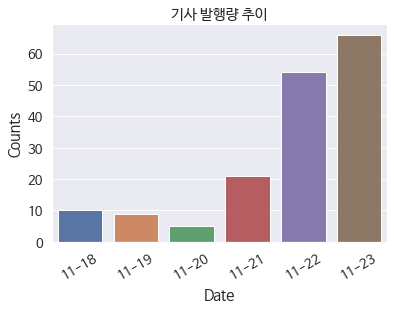

In [37]:
sns.barplot(x="Date", y="Counts", data=art_follower)
plt.xticks(rotation=30)
plt.title("기사 발행량 추이")
plt.savefig("../weekly_plots/{}/article_transparent.png".format(date_week), transparent=True)

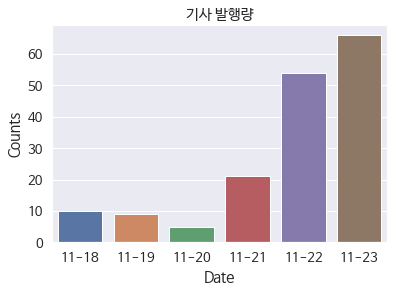

In [38]:
# fig, axes = plt.subplots(1,3, figsize=(15,5))
# fig.suptitle("기사 발행량 현황")
# plt.subplots_adjust()


    
# 유투브 조회수
sns.barplot(x="Date", y="Counts", data=art_follower)
# for index, row in art_follower.iterrows():
#     plt.text(index, row['Counts'], str(row['Counts']), ha='center')
plt.title("기사 발행량")
plt.savefig("../weekly_plots/{}/articles.png".format(date_week), transperent=True)
# ## Temp
# sns.barplot(ax=axes[1], x=title_gr_sum['Views'], y=title_gr_sum['Video title'])
# axes[1].set_title("인기 동영상")
# plt.savefig("../weekly_plots/2021-10-18/youtube_views.png")


/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


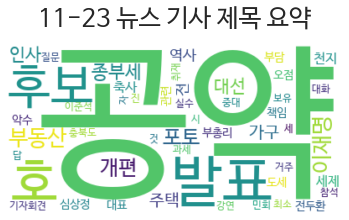

In [45]:
# WordCloud Previous and now
t = Twitter()

grp_keys = list(grs.groups.keys())

wcs = {}
for idx, k in enumerate(grp_keys):
    font_path = "./NanumBarunGothic.ttf"
    df_g = grs.get_group(k)
    title_txt = df_g.title.to_string()
    tokens = t.nouns(title_txt)
    ko = nltk.Text(tokens, name="뉴스 기사")
    data = ko.vocab().most_common(50)
    data = data[1:] # 김동연 제외
    wc = WordCloud(font_path=font_path, 
                   background_color="white", max_words=1000,max_font_size=300).generate_from_frequencies(dict(data))

    
    plt.title(k.strftime("%m-%d") + " 뉴스 기사 제목 요약", fontsize=25, pad=20)
    plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    wcs[idx] = wc
    #wc.to_file('../weekly_plots/2021-10-18/wc_{}_{}_week{}.png'.format(k.month, k.day, k.isocalendar()[1]))
    plt.savefig('../weekly_plots/{}/wc_{}_{}_week{}.png'.format(date_week, k.month, k.day, k.isocalendar()[1]), 
               transparent=True)

## Datalab

In [46]:
df_datalab = pd.read_csv("../sns_data/{}/datalab/datalab.csv".format(date_week))
df_datalab= df_datalab.iloc[6:]
df_datalab.columns = ["Date", "검색량"]
df_datalab['Date'] = pd.to_datetime(df_datalab['Date'])

df_datalab['Date'] = df_datalab['Date'].map(lambda x : x.strftime("%m-%d"))
df_datalab["검색량"]= df_datalab['검색량'].map(lambda x : float(x))

In [47]:

df_datalab.iloc[6:]

,Date,검색량
12,11-23,66.60359


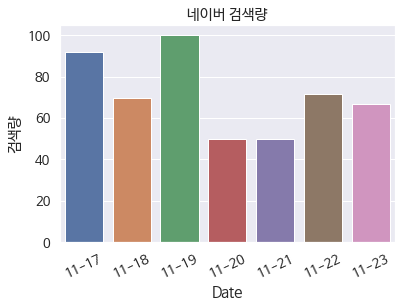

In [48]:

# 유투브 조회수
sns.barplot(x="Date", y="검색량", data=df_datalab)
plt.title("네이버 검색량")
plt.xticks(rotation=25)
plt.savefig("../weekly_plots/{}/datalab_search.png".format(date_week), transparent=True, dpi=100)